In [1]:
import pandas as pd

ports_df = pd.read_csv("../assets/ports.csv").drop(columns="Unnamed: 0")
tide_heights_df = pd.read_csv("../assets/tide_heights.csv")
vessels_df = pd.read_csv("../assets/vessels.csv").drop(columns="Unnamed: 0")

In [36]:
ports_df

,NAME,LATITUDE,LONGITUDE,UNLOCODE,APPROACH_MLLW_METERS
0,Abbot Point,-19.859141,148.083663,AUABP,17.2
1,Brisbane,-27.376286,153.163766,AUBNE,14.0
2,Cooktown,-15.459552,145.249484,AUCTN,14.1
3,Dampier,-20.663411,116.701119,AUDAM,14.6


In [37]:
tide_heights_df

,TIDE_HEIGHT_ID,PORT_NAME,TIDE_DATETIME,TIDE_HEIGHT_MT,TIDE_TYPE
0,564218779,Abbot Point,2024-03-01 00:47:02.000,1.36,HIGH
1,564218780,Abbot Point,2024-03-01 06:25:59.000,0.97,LOW
2,564218781,Abbot Point,2024-03-01 11:59:30.000,1.41,HIGH
3,564218782,Abbot Point,2024-03-01 18:58:48.000,0.56,LOW
4,564844113,Abbot Point,2024-03-02 12:40:08.000,1.20,HIGH
...,...,...,...,...,...
2321,609489281,Dampier,2024-08-26 02:20:05.000,3.16,HIGH
2322,609489282,Dampier,2024-08-26 08:52:51.000,-0.32,LOW
2323,609489283,Dampier,2024-08-26 14:48:04.000,2.44,HIGH
2324,609489284,Dampier,2024-08-26 20:44:55.000,0.20,LOW


In [38]:
vessels_df

,IMO,DRAUGHT,NAME,DWT
0,9790933,13.418,UNITY LIFE,63482.0
1,9331866,12.573,MING HUA,55682.0
2,9251315,12.020,VIVA GLOBUS,52300.0
3,9494008,14.430,VELSHEDA,82172.0
4,9461128,14.429,NEA TYHI,82211.0
5,9473121,14.210,NIKOLAOS,75538.0
6,9582116,14.450,EPIPHANIA,80276.0
7,9991234,36.800,JIMMY T,1704.0
8,9758571,14.450,HUA SHENG HAI,81232.0
9,9591765,14.900,MBA ROSARIA,93326.0


### Vessels

#### IMO is a unique identifier for the vessel.
#### DRAUGHT indicates how deep the vessel sits in the water.
#### NAME is the vessel's name.
#### DWT shows the vessel's carrying capacity in metric tons.

# Interpoliation

/Users/ulrikpedersen/Documents/Private/ds-test-UTP/cassia/interpolation.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_tide_data['TIDE_DATETIME'] = pd.to_datetime(port_tide_data['TIDE_DATETIME'])
/Users/ulrikpedersen/Documents/Private/ds-test-UTP/cassia/interpolation.py:31: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_range = pd.date_range(start=arrival_time, periods=14*24*60, freq='T')


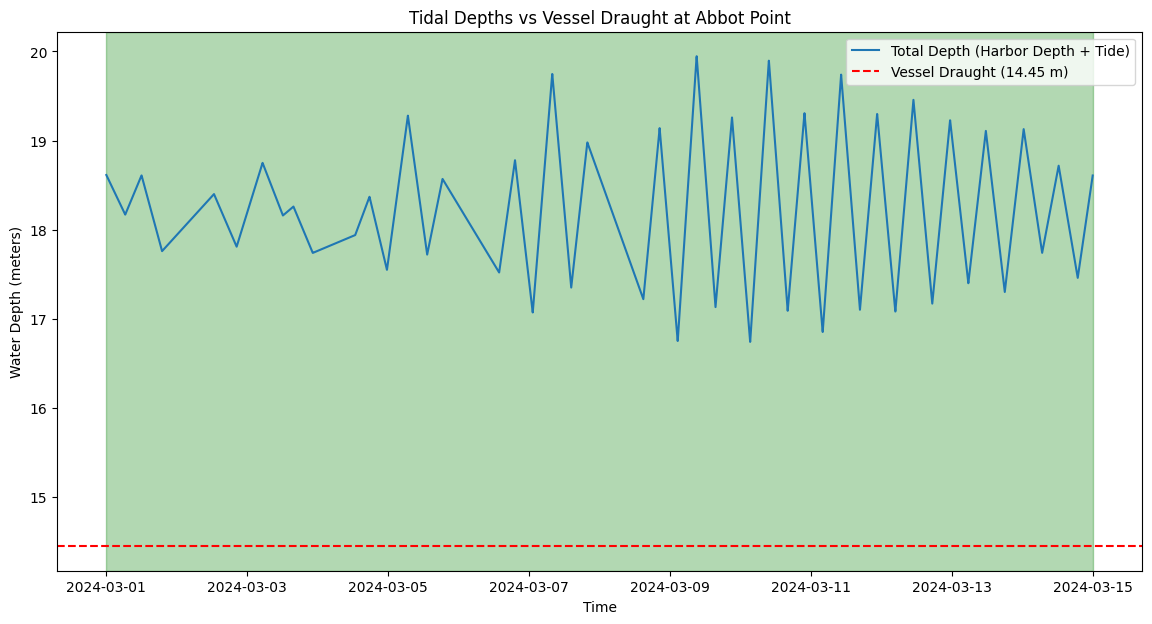

Tidal Window: 2024-03-01 00:00:00 to 2024-03-14 23:59:00


In [39]:
# Example usage:
arrival_time = pd.Timestamp('2024-03-01 00:00:00')
imo = 9582116  # Example IMO for "EPIPHANIA"
unlocode = 'AUABP'  # UNLOCODE for Abbot Point

# Assuming tide_heights_df is already loaded
tidal_windows, time_range, total_depths = calculate_tidal_windows(imo, unlocode, arrival_time, tide_heights_df, vessels_dispatcher, ports_dispatcher)

# Now plot the results
plot_tidal_windows(tidal_windows, time_range, total_depths, vessels_dispatcher[imo].draught, ports_dispatcher[unlocode].name)

# Output the tidal windows
for window_start, window_end in tidal_windows:
    print(f"Tidal Window: {window_start} to {window_end}")


# Daylight

In [56]:
# Print tidal windows
print("Tidal Windows:")
for window_start, window_end in tidal_windows:
    print(f"Tidal Window: {window_start} to {window_end}")

# Print daylight windows
print("\nDaylight Windows:")
for window_start, window_end in daylight_windows:
    print(f"Daylight Window: {window_start} to {window_end}")

# Now try combining them again and see if they overlap
combined_windows = combine_tidal_and_daylight_windows(tidal_windows, daylight_windows)

if not combined_windows:
    print("\nNo combined windows found. Check if tidal windows overlap with daylight windows.")
else:
    print("\nCombined Windows:")
    for window_start, window_end in combined_windows:
        print(f"Combined Window: {window_start} to {window_end}")


Tidal Windows:
Tidal Window: 2024-03-01 00:00:00 to 2024-03-14 23:59:00

Daylight Windows:
Daylight Window: 2024-03-01 20:06:01.436258 to 2024-03-01 08:33:58.513561
Daylight Window: 2024-03-02 20:06:22.864523 to 2024-03-02 08:33:12.418624
Daylight Window: 2024-03-03 20:06:43.898198 to 2024-03-03 08:32:25.772122
Daylight Window: 2024-03-04 20:07:04.549836 to 2024-03-04 08:31:38.600488
Daylight Window: 2024-03-05 20:07:24.832361 to 2024-03-05 08:30:50.930189
Daylight Window: 2024-03-06 20:07:44.759031 to 2024-03-06 08:30:02.787709
Daylight Window: 2024-03-07 20:08:04.343414 to 2024-03-07 08:29:14.199539
Daylight Window: 2024-03-08 20:08:23.599353 to 2024-03-08 08:28:25.192161
Daylight Window: 2024-03-09 20:08:42.540940 to 2024-03-09 08:27:35.792036
Daylight Window: 2024-03-10 20:09:01.182488 to 2024-03-10 08:26:46.025592
Daylight Window: 2024-03-11 20:09:19.538503 to 2024-03-11 08:25:55.919216
Daylight Window: 2024-03-12 20:09:37.623658 to 2024-03-12 08:25:05.499243
Daylight Window: 2024

In [13]:
from cassia.daylight import get_daylight_windows_corrected, combine_tidal_and_daylight_windows
from cassia.plotting import format_windows, plot_combined_windows

ImportError: cannot import name 'format_windows' from 'cassia.plotting' (/Users/ulrikpedersen/Documents/Private/ds-test-UTP/cassia/plotting.py)


Combined Windows:
Combined Window: 2024-03-01 08:33:58.513561 to 2024-03-01 20:06:01.436258
Combined Window: 2024-03-02 08:33:12.418624 to 2024-03-02 20:06:22.864523
Combined Window: 2024-03-03 08:32:25.772122 to 2024-03-03 20:06:43.898198
Combined Window: 2024-03-04 08:31:38.600488 to 2024-03-04 20:07:04.549836
Combined Window: 2024-03-05 08:30:50.930189 to 2024-03-05 20:07:24.832361
Combined Window: 2024-03-06 08:30:02.787709 to 2024-03-06 20:07:44.759031
Combined Window: 2024-03-07 08:29:14.199539 to 2024-03-07 20:08:04.343414
Combined Window: 2024-03-08 08:28:25.192161 to 2024-03-08 20:08:23.599353
Combined Window: 2024-03-09 08:27:35.792036 to 2024-03-09 20:08:42.540940
Combined Window: 2024-03-10 08:26:46.025592 to 2024-03-10 20:09:01.182488
Combined Window: 2024-03-11 08:25:55.919216 to 2024-03-11 20:09:19.538503
Combined Window: 2024-03-12 08:25:05.499243 to 2024-03-12 20:09:37.623658
Combined Window: 2024-03-13 08:24:14.791945 to 2024-03-13 20:09:55.452766
Combined Window: 20

/var/folders/wc/f4tfpv1s0dd6ldvpcmsxczdc0000gn/T/ipykernel_92879/1428757821.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_tide_data['TIDE_DATETIME'] = pd.to_datetime(port_tide_data['TIDE_DATETIME'])
/var/folders/wc/f4tfpv1s0dd6ldvpcmsxczdc0000gn/T/ipykernel_92879/1428757821.py:36: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_range = pd.date_range(start=arrival_time, periods=14*24*60, freq='T')


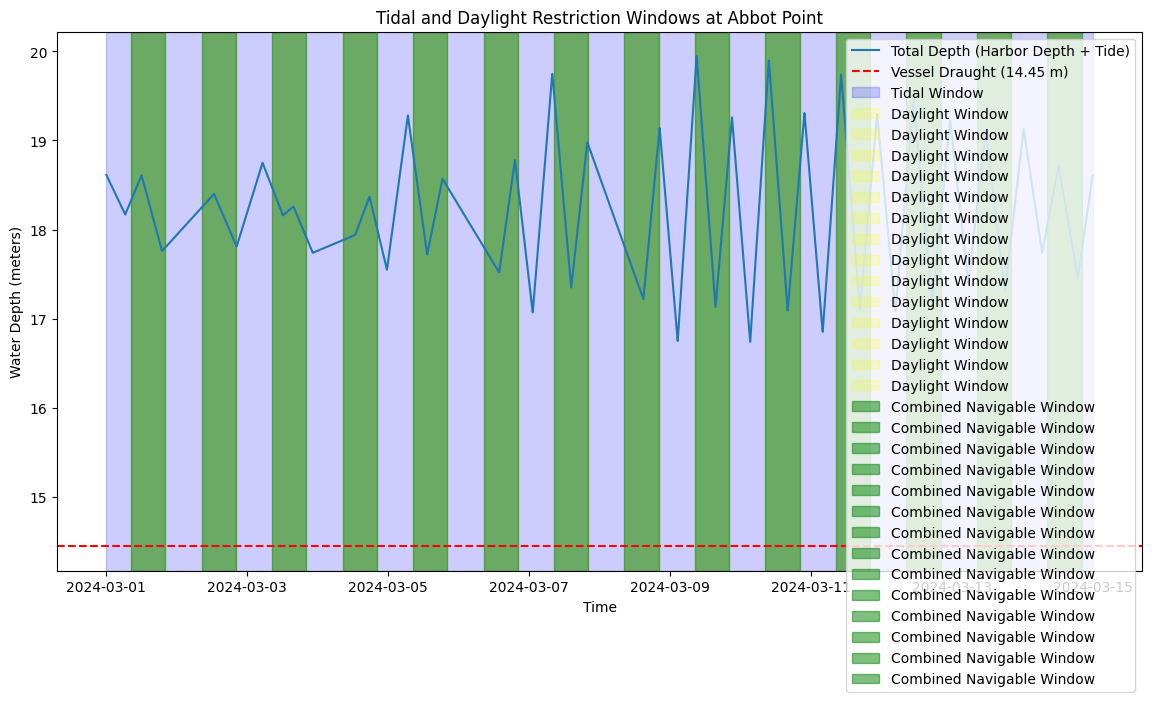

In [14]:
# Example usage:
arrival_time = pd.Timestamp('2024-03-01 00:00:00')
imo = 9582116  # Example IMO for "EPIPHANIA"
unlocode = 'AUABP'  # UNLOCODE for Abbot Point

# Assuming tide_heights_df is already loaded
tidal_windows, time_range, total_depths = calculate_tidal_windows(imo, unlocode, arrival_time, tide_heights_df, vessels_dispatcher, ports_dispatcher)

# Retrieve port information correctly before using it
port = ports_dispatcher[unlocode]

# Get daylight windows and correct the format
daylight_windows = get_daylight_windows_corrected(port.latitude, port.longitude, arrival_time)
daylight_windows = format_windows(daylight_windows)

# Format tidal windows similarly, if needed
tidal_windows = format_windows(tidal_windows)

# Combine the corrected and formatted tidal and daylight windows
combined_windows = combine_tidal_and_daylight_windows(tidal_windows, daylight_windows)

# Output the combined tidal and daylight windows
if not combined_windows:
    print("\nNo combined windows found. Check if tidal windows overlap with daylight windows.")
else:
    print("\nCombined Windows:")
    for window_start, window_end in combined_windows:
        print(f"Combined Window: {window_start} to {window_end}")

# Plot the results
plot_combined_windows(time_range, total_depths, vessels_dispatcher[imo].draught, tidal_windows, daylight_windows, combined_windows, port.name)


In [15]:
combined_windows

[(Timestamp('2024-03-01 08:33:58.513561'),
  Timestamp('2024-03-01 20:06:01.436258')),
 (Timestamp('2024-03-02 08:33:12.418624'),
  Timestamp('2024-03-02 20:06:22.864523')),
 (Timestamp('2024-03-03 08:32:25.772122'),
  Timestamp('2024-03-03 20:06:43.898198')),
 (Timestamp('2024-03-04 08:31:38.600488'),
  Timestamp('2024-03-04 20:07:04.549836')),
 (Timestamp('2024-03-05 08:30:50.930189'),
  Timestamp('2024-03-05 20:07:24.832361')),
 (Timestamp('2024-03-06 08:30:02.787709'),
  Timestamp('2024-03-06 20:07:44.759031')),
 (Timestamp('2024-03-07 08:29:14.199539'),
  Timestamp('2024-03-07 20:08:04.343414')),
 (Timestamp('2024-03-08 08:28:25.192161'),
  Timestamp('2024-03-08 20:08:23.599353')),
 (Timestamp('2024-03-09 08:27:35.792036'),
  Timestamp('2024-03-09 20:08:42.540940')),
 (Timestamp('2024-03-10 08:26:46.025592'),
  Timestamp('2024-03-10 20:09:01.182488')),
 (Timestamp('2024-03-11 08:25:55.919216'),
  Timestamp('2024-03-11 20:09:19.538503')),
 (Timestamp('2024-03-12 08:25:05.499243'),


/var/folders/wc/f4tfpv1s0dd6ldvpcmsxczdc0000gn/T/ipykernel_92879/1428757821.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_tide_data['TIDE_DATETIME'] = pd.to_datetime(port_tide_data['TIDE_DATETIME'])
/var/folders/wc/f4tfpv1s0dd6ldvpcmsxczdc0000gn/T/ipykernel_92879/1428757821.py:36: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_range = pd.date_range(start=arrival_time, periods=14*24*60, freq='T')



Combined Windows:
Combined Window: 2024-03-01 08:18:30.338767 to 2024-03-01 17:28:00
Combined Window: 2024-03-02 08:17:29.574026 to 2024-03-02 18:10:00
Combined Window: 2024-03-03 08:16:28.227864 to 2024-03-03 19:10:00
Combined Window: 2024-03-04 08:15:26.329444 to 2024-03-04 19:42:45.595504
Combined Window: 2024-03-05 08:14:23.907886 to 2024-03-05 19:43:20.680000
Combined Window: 2024-03-06 13:45:00 to 2024-03-06 19:43:55.428931
Combined Window: 2024-03-07 08:12:17.611526 to 2024-03-07 12:50:00
Combined Window: 2024-03-07 15:17:00 to 2024-03-07 19:44:29.853367
Combined Window: 2024-03-08 08:11:13.794634 to 2024-03-08 08:41:00
Combined Window: 2024-03-08 16:23:00 to 2024-03-08 19:45:03.964727
Combined Window: 2024-03-09 08:10:09.570405 to 2024-03-09 13:54:00
Combined Window: 2024-03-09 17:18:00 to 2024-03-09 19:45:37.774737
Combined Window: 2024-03-10 08:09:04.967578 to 2024-03-10 14:29:00
Combined Window: 2024-03-10 18:03:00 to 2024-03-10 19:46:11.295404
Combined Window: 2024-03-11 0

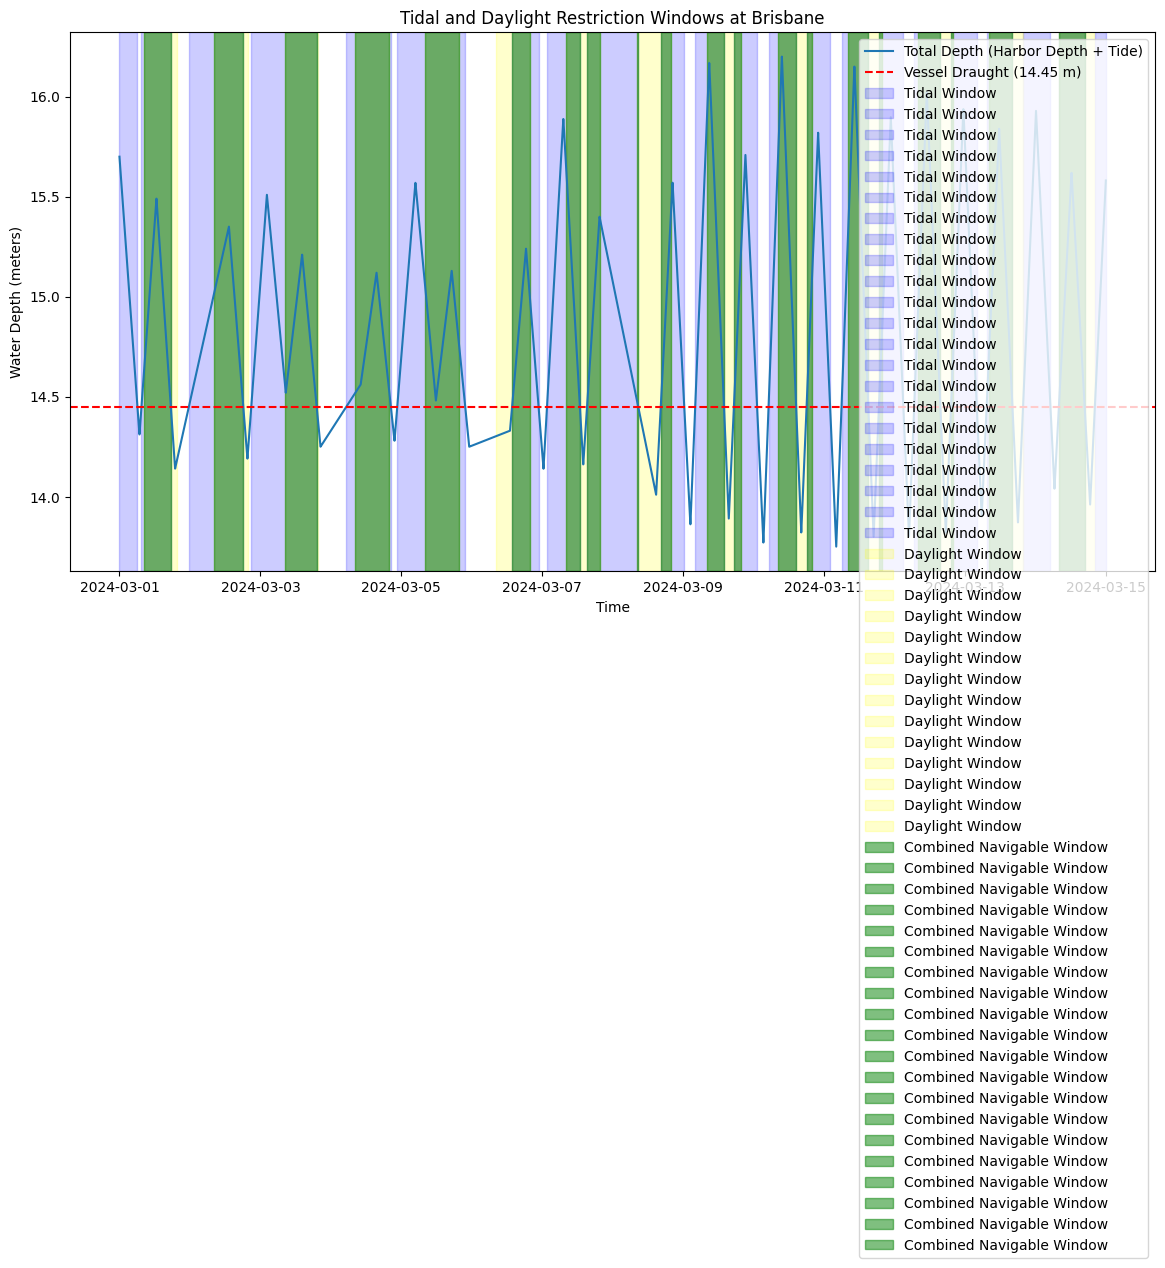

In [12]:
# Example usage:
arrival_time = pd.Timestamp('2024-03-01 00:00:00')
imo = 9582116  # Example IMO for "EPIPHANIA"
unlocode = 'AUBNE'  # UNLOCODE for Abbot Point

# Assuming tide_heights_df is already loaded
tidal_windows, time_range, total_depths = calculate_tidal_windows(imo, unlocode, arrival_time, tide_heights_df, vessels_dispatcher, ports_dispatcher)

# Retrieve port information correctly before using it
port = ports_dispatcher[unlocode]

# Get daylight windows and correct the format
daylight_windows = get_daylight_windows_corrected(port.latitude, port.longitude, arrival_time)
daylight_windows = format_windows(daylight_windows)

# Format tidal windows similarly, if needed
tidal_windows = format_windows(tidal_windows)

# Combine the corrected and formatted tidal and daylight windows
combined_windows = combine_tidal_and_daylight_windows(tidal_windows, daylight_windows)

# Output the combined tidal and daylight windows
if not combined_windows:
    print("\nNo combined windows found. Check if tidal windows overlap with daylight windows.")
else:
    print("\nCombined Windows:")
    for window_start, window_end in combined_windows:
        print(f"Combined Window: {window_start} to {window_end}")

# Plot the results
plot_combined_windows(time_range, total_depths, vessels_dispatcher[imo].draught, tidal_windows, daylight_windows, combined_windows, port.name)

# Cassia

In [2]:
from cassia.dispatchers import ports_dispatcher, vessels_dispatcher

In [3]:
from cassia.cassia import Cassia


Combined Windows:
Combined Window: 2024-03-01 08:33:58.513561 to 2024-03-01 20:06:01.436258
Combined Window: 2024-03-02 08:33:12.418624 to 2024-03-02 20:06:22.864523
Combined Window: 2024-03-03 08:32:25.772122 to 2024-03-03 20:06:43.898198
Combined Window: 2024-03-04 08:31:38.600488 to 2024-03-04 20:07:04.549836
Combined Window: 2024-03-05 08:30:50.930189 to 2024-03-05 20:07:24.832361
Combined Window: 2024-03-06 08:30:02.787709 to 2024-03-06 20:07:44.759031
Combined Window: 2024-03-07 08:29:14.199539 to 2024-03-07 20:08:04.343414
Combined Window: 2024-03-08 08:28:25.192161 to 2024-03-08 20:08:23.599353
Combined Window: 2024-03-09 08:27:35.792036 to 2024-03-09 20:08:42.540940
Combined Window: 2024-03-10 08:26:46.025592 to 2024-03-10 20:09:01.182488
Combined Window: 2024-03-11 08:25:55.919216 to 2024-03-11 20:09:19.538503
Combined Window: 2024-03-12 08:25:05.499243 to 2024-03-12 20:09:37.623658
Combined Window: 2024-03-13 08:24:14.791945 to 2024-03-13 20:09:55.452766
Combined Window: 20

/Users/ulrikpedersen/Documents/Private/ds-test-UTP/cassia/cassia.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_tide_data['TIDE_DATETIME'] = pd.to_datetime(port_tide_data['TIDE_DATETIME'])
/Users/ulrikpedersen/Documents/Private/ds-test-UTP/cassia/cassia.py:41: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_range = pd.date_range(start=arrival_time, periods=14*24*60, freq='T')


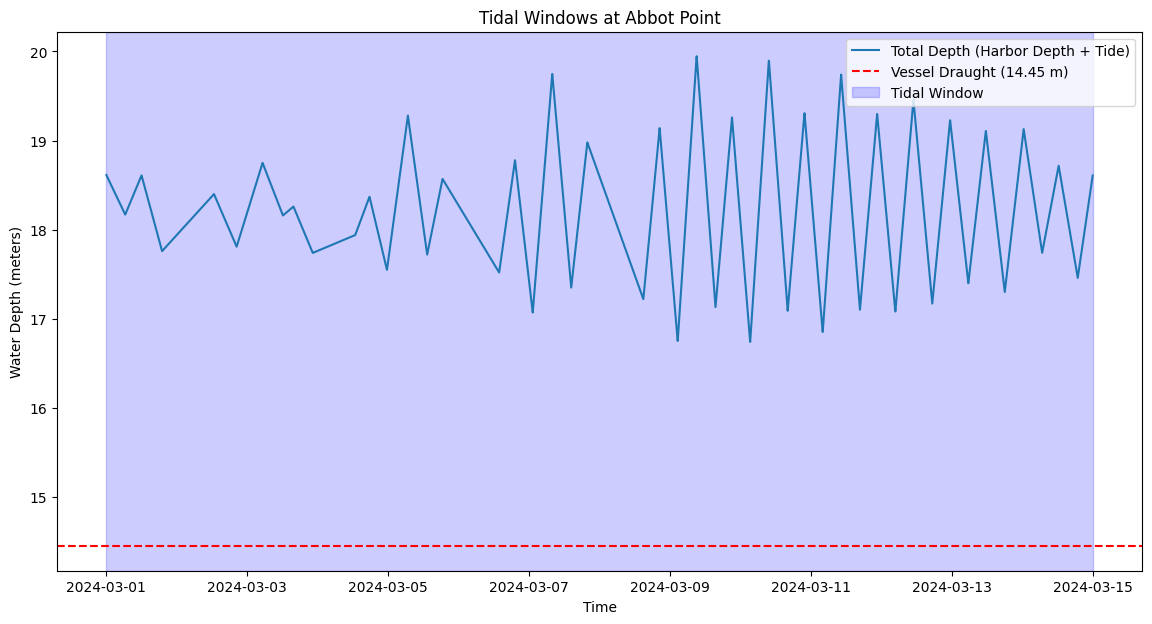

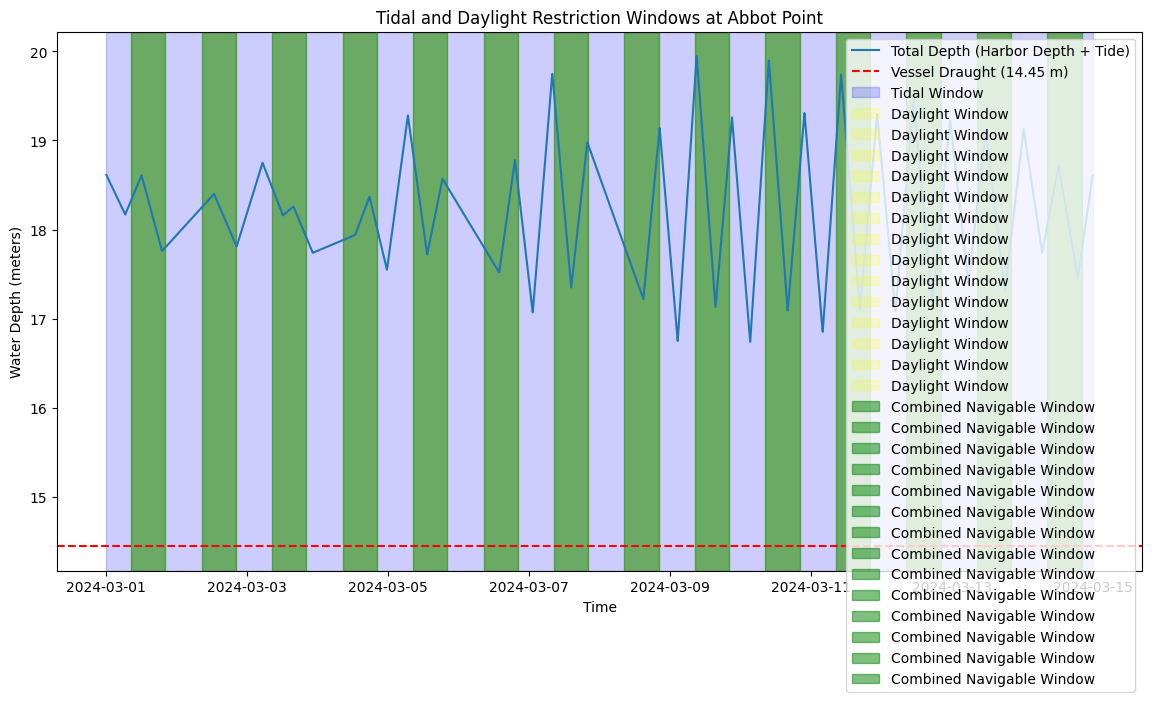

In [4]:
# Instantiate the Cassia class with the dataframes and dispatchers
cassia = Cassia(tide_heights_df, vessels_dispatcher, ports_dispatcher)

# Example usage:
arrival_time = pd.Timestamp('2024-03-01 00:00:00')
imo = 9582116  # Example IMO for "EPIPHANIA"
unlocode = 'AUABP'  # UNLOCODE for Abbot Point

# Calculate tidal windows
tidal_windows, time_range, total_depths = cassia.calculate_tidal_windows(imo, unlocode, arrival_time)

# Get daylight windows and correct the format
daylight_windows = cassia.get_daylight_windows(unlocode, arrival_time)
daylight_windows = cassia.format_windows(daylight_windows)

# Combine the corrected and formatted tidal and daylight windows
combined_windows = cassia.combine_windows(tidal_windows, daylight_windows)

# Output the combined tidal and daylight windows
if not combined_windows:
    print("\nNo combined windows found. Check if tidal windows overlap with daylight windows.")
else:
    print("\nCombined Windows:")
    for window_start, window_end in combined_windows:
        print(f"Combined Window: {window_start} to {window_end}")

# Plot the tidal windows
cassia.plot_tidal_windows(time_range, total_depths, vessels_dispatcher[imo].draught, tidal_windows, ports_dispatcher[unlocode].name)

# Plot the combined windows
cassia.plot_combined_windows(time_range, total_depths, vessels_dispatcher[imo].draught, tidal_windows, daylight_windows, combined_windows, ports_dispatcher[unlocode].name)


In [1]:
from cassia.cassia import Cassia
import pandas as pd

In [2]:
# Instantiate the Cassia class with the tide heights dataframe
cassia = Cassia()

# Example usage:
arrival_time = pd.Timestamp('2024-03-01 00:00:00')
imo = 9582116  # Example IMO for "EPIPHANIA"
unlocode = 'AUBNE'  # UNLOCODE for Abbot Point

# Calculate tidal windows using the class method
tidal_windows, time_range, total_depths = cassia.calculate_tidal_windows(imo, unlocode, arrival_time)


/Users/ulrikpedersen/Documents/Private/ds-test-UTP/cassia/interpolation.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_tide_data["TIDE_DATETIME"] = pd.to_datetime(port_tide_data["TIDE_DATETIME"])
/Users/ulrikpedersen/Documents/Private/ds-test-UTP/cassia/interpolation.py:33: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_range = pd.date_range(start=arrival_time, periods=14 * 24 * 60, freq="T")


In [3]:
# Get daylight windows using the class method
daylight_windows = cassia.get_daylight_windows(unlocode, arrival_time)

In [4]:
daylight_windows

[(datetime.datetime(2024, 3, 1, 8, 18, 30, 338767),
  datetime.datetime(2024, 3, 1, 19, 40, 58, 223786)),
 (datetime.datetime(2024, 3, 2, 8, 17, 29, 574026),
  datetime.datetime(2024, 3, 2, 19, 41, 34, 377454)),
 (datetime.datetime(2024, 3, 3, 8, 16, 28, 227864),
  datetime.datetime(2024, 3, 3, 19, 42, 10, 164749)),
 (datetime.datetime(2024, 3, 4, 8, 15, 26, 329444),
  datetime.datetime(2024, 3, 4, 19, 42, 45, 595504)),
 (datetime.datetime(2024, 3, 5, 8, 14, 23, 907886),
  datetime.datetime(2024, 3, 5, 19, 43, 20, 680000)),
 (datetime.datetime(2024, 3, 6, 8, 13, 20, 992249),
  datetime.datetime(2024, 3, 6, 19, 43, 55, 428931)),
 (datetime.datetime(2024, 3, 7, 8, 12, 17, 611526),
  datetime.datetime(2024, 3, 7, 19, 44, 29, 853367)),
 (datetime.datetime(2024, 3, 8, 8, 11, 13, 794634),
  datetime.datetime(2024, 3, 8, 19, 45, 3, 964727)),
 (datetime.datetime(2024, 3, 9, 8, 10, 9, 570405),
  datetime.datetime(2024, 3, 9, 19, 45, 37, 774737)),
 (datetime.datetime(2024, 3, 10, 8, 9, 4, 967578

In [7]:
tidal_windows

[(Timestamp('2024-03-01 00:00:00'), Timestamp('2024-03-01 06:07:00')),
 (Timestamp('2024-03-01 07:30:00'), Timestamp('2024-03-01 17:28:00')),
 (Timestamp('2024-03-01 23:39:00'), Timestamp('2024-03-02 18:10:00')),
 (Timestamp('2024-03-02 20:54:00'), Timestamp('2024-03-03 19:10:00')),
 (Timestamp('2024-03-04 05:18:00'), Timestamp('2024-03-04 20:26:00')),
 (Timestamp('2024-03-04 22:38:00'), Timestamp('2024-03-05 21:45:00')),
 (Timestamp('2024-03-06 13:45:00'), Timestamp('2024-03-06 22:45:00')),
 (Timestamp('2024-03-07 01:38:00'), Timestamp('2024-03-07 12:50:00')),
 (Timestamp('2024-03-07 15:17:00'), Timestamp('2024-03-08 08:41:00')),
 (Timestamp('2024-03-08 16:23:00'), Timestamp('2024-03-09 00:22:00')),
 (Timestamp('2024-03-09 04:07:00'), Timestamp('2024-03-09 13:54:00')),
 (Timestamp('2024-03-09 17:18:00'), Timestamp('2024-03-10 01:11:00')),
 (Timestamp('2024-03-10 05:06:00'), Timestamp('2024-03-10 14:29:00')),
 (Timestamp('2024-03-10 18:03:00'), Timestamp('2024-03-11 02:03:00')),
 (Time

In [5]:
from cassia.cassia import Cassia
import pandas as pd



In [6]:
# Initialize Cassia
cassia = Cassia()

# Example usage
arrival_time = pd.Timestamp('2024-03-01 00:00:00')
imo = 9582116  # Example IMO for "EPIPHANIA"
unlocode = 'AUBNE'  # UNLOCODE for Abbot Point

# Get combined windows
combined_windows = cassia.get_combined_windows(imo, unlocode, arrival_time)

# Plot the tidal windows

# Plot the combined windows
#cassia.plot_combined_windows(time_range, total_depths, vessel_draught, tidal_windows, daylight_windows, combined_windows, port_name)


/Users/ulrikpedersen/Documents/Private/ds-test-UTP/cassia/interpolation.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_tide_data["TIDE_DATETIME"] = pd.to_datetime(port_tide_data["TIDE_DATETIME"])
/Users/ulrikpedersen/Documents/Private/ds-test-UTP/cassia/interpolation.py:33: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_range = pd.date_range(start=arrival_time, periods=14 * 24 * 60, freq="T")


In [9]:
cassia.get_tidal_windows(imo=imo, unlocode=unlocode, arrival_time=arrival_time)

/Users/ulrikpedersen/Documents/Private/ds-test-UTP/cassia/interpolation.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_tide_data["TIDE_DATETIME"] = pd.to_datetime(port_tide_data["TIDE_DATETIME"])
/Users/ulrikpedersen/Documents/Private/ds-test-UTP/cassia/interpolation.py:33: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_range = pd.date_range(start=arrival_time, periods=14 * 24 * 60, freq="T")


([(Timestamp('2024-03-01 00:00:00'), Timestamp('2024-03-01 06:07:00')),
  (Timestamp('2024-03-01 07:30:00'), Timestamp('2024-03-01 17:28:00')),
  (Timestamp('2024-03-01 23:39:00'), Timestamp('2024-03-02 18:10:00')),
  (Timestamp('2024-03-02 20:54:00'), Timestamp('2024-03-03 19:10:00')),
  (Timestamp('2024-03-04 05:18:00'), Timestamp('2024-03-04 20:26:00')),
  (Timestamp('2024-03-04 22:38:00'), Timestamp('2024-03-05 21:45:00')),
  (Timestamp('2024-03-06 13:45:00'), Timestamp('2024-03-06 22:45:00')),
  (Timestamp('2024-03-07 01:38:00'), Timestamp('2024-03-07 12:50:00')),
  (Timestamp('2024-03-07 15:17:00'), Timestamp('2024-03-08 08:41:00')),
  (Timestamp('2024-03-08 16:23:00'), Timestamp('2024-03-09 00:22:00')),
  (Timestamp('2024-03-09 04:07:00'), Timestamp('2024-03-09 13:54:00')),
  (Timestamp('2024-03-09 17:18:00'), Timestamp('2024-03-10 01:11:00')),
  (Timestamp('2024-03-10 05:06:00'), Timestamp('2024-03-10 14:29:00')),
  (Timestamp('2024-03-10 18:03:00'), Timestamp('2024-03-11 02:03

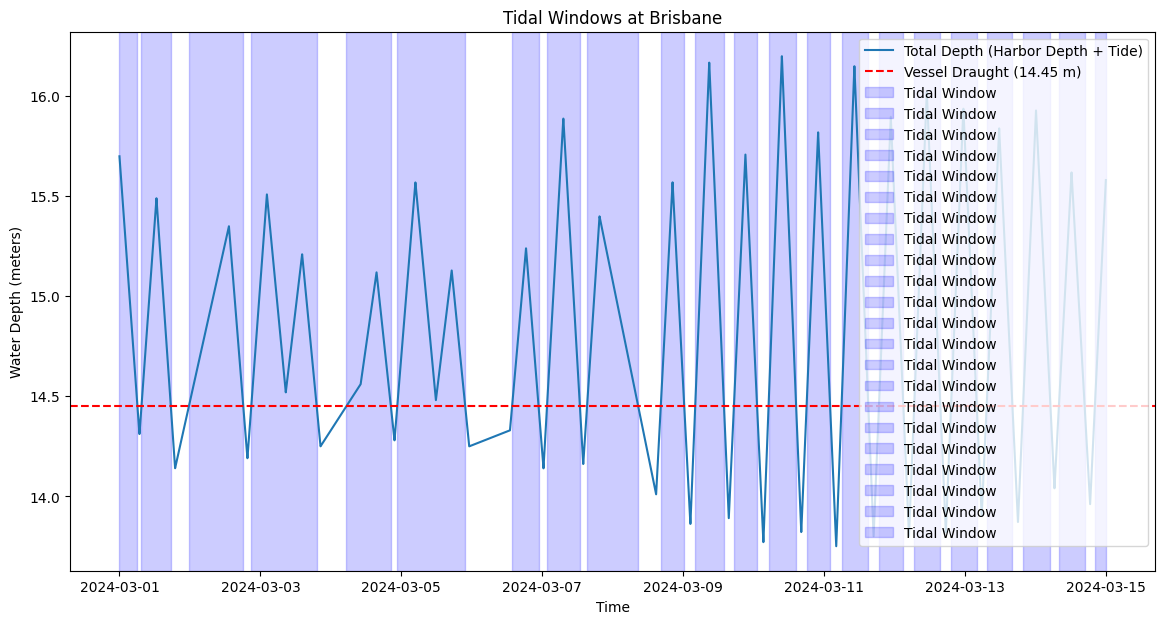

In [10]:
cassia.plot_tidal_windows(imo=imo,unlocode=unlocode)

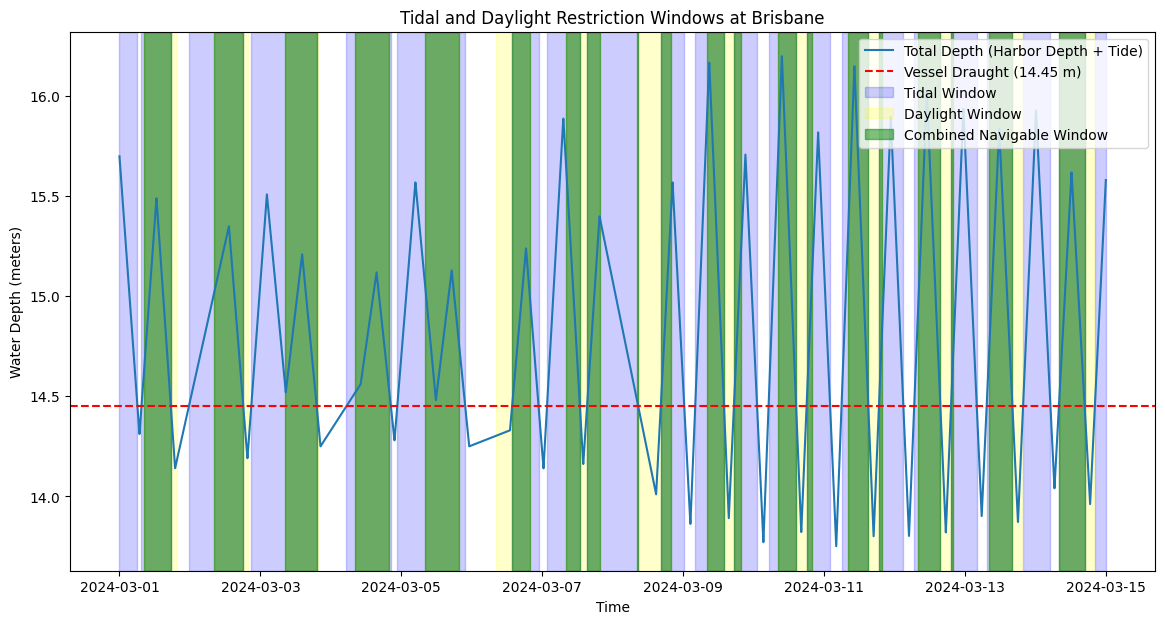

In [4]:
cassia.plot_combined_windows(imo=imo, unlocode=unlocode)


In [2]:
cassia.calculate_combined_windows

<bound method Cassia.calculate_combined_windows of <cassia.cassia.Cassia object at 0x10ed79a90>>

In [3]:
cassia.vessels_dispatcher.get(imo).draught

14.45

In [4]:
cassia.plot_tidal_windows(imo=imo, unlocode=unlocode, arrival_time=arrival_time)

KeyError: 9582116

In [ ]:
cassia.vessels_dispatcher.get(9582116)

Vessel(imo=9582116, draught=14.45, name='EPIPHANIA', dwt=80276.0)

In [3]:
# Example usage:
arrival_time = pd.Timestamp('2024-03-01 00:00:00')
imo = 9582116  # Example IMO for "EPIPHANIA"
unlocode = 'AUABP'  # UNLOCODE for Abbot Point

# Debug: Print the IMO value
print(f"IMO value being passed: {imo}")

# Check if the key exists before proceeding
if imo in cassia.vessels_dispatcher:
    cassia.plot_tidal_windows(imo, unlocode, arrival_time)
else:
    print(f"Vessel with IMO {imo} not found in vessels_dispatcher.")


IMO value being passed: 9582116


KeyError: 9582116

In [2]:
print(f"Available keys in vessels_dispatcher: {list(cassia.vessels_dispatcher.keys())}")


Available keys in vessels_dispatcher: [9790933, 9331866, 9251315, 9494008, 9461128, 9473121, 9582116, 9991234, 9758571, 9591765]
